IMPORTING AND LOADING DATASET

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("Churn.csv")
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [36]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
data.shape

(10000, 14)

UNIVARIATE ANALYSIS

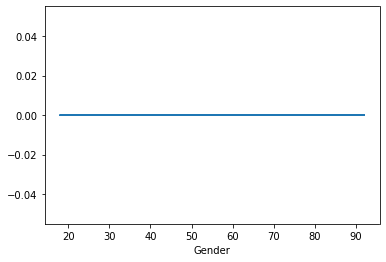

In [38]:
data_France=data.loc[data['Geography']=='France']
plt.plot(data_France['Age'], np.zeros_like(data_France['Age']))
plt.xlabel('Gender')
plt.show()

BI-VARIATE ANALYSIS

c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


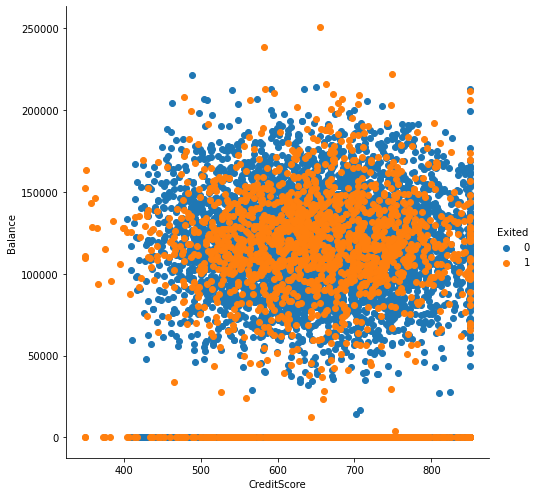

In [39]:
sns.FacetGrid(data,hue="Exited",height=7).map(plt.scatter,"CreditScore" , "Balance").add_legend();
plt.show()

MULTIVARIATE ANALYSIS

In [40]:
sns.pairplot(data,hue="Exited",height=7)

DESCRIPTIVE STATISTIC ANALYSIS

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data['CreditScore'].value_counts().to_frame()

,CreditScore
850,233
678,63
655,54
705,53
667,53
...,...
404,1
351,1
365,1
417,1


In [ ]:
Creditscore_counts=data['CreditScore'].value_counts().to_frame()
Creditscore_counts.rename(columns={'CreditScore':'value counts'},inplace=True)
Creditscore_counts
Creditscore_counts.index.name='Model'
Creditscore_counts

,value counts
Model,
850,233
678,63
655,54
705,53
667,53
...,...
404,1
351,1
365,1


HANDLE MISSING DATA

<AxesSubplot: >

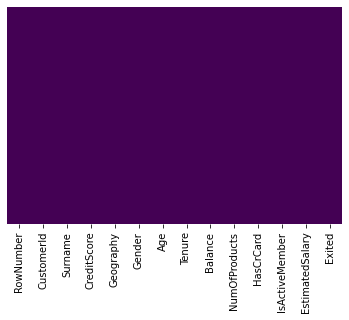

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

DETECTING AND REPLACING OUTLIERS

In [ ]:
max_thresold=data['CreditScore'].quantile(0.95)
max_thresold
data[data['CreditScore']>max_thresold]
min_thresold=data['CreditScore'].quantile(0.05)
min_thresold
data[data['CreditScore']<min_thresold]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
29,30,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
40,41,15619360,Hsiao,472,Spain,Male,40,4,0.00,1,1,0,70154.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9879,9880,15669414,Pisano,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9907,9908,15611247,McKenzie,481,France,Female,28,10,0.00,2,1,0,145215.96,0
9930,9931,15713604,Rossi,425,Germany,Male,40,9,166776.60,2,0,1,172646.88,0
9964,9965,15642785,Douglas,479,France,Male,34,5,117593.48,2,0,0,113308.29,0


In [ ]:
data[(data['CreditScore']<max_thresold) & (data['CreditScore']>min_thresold)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


CATEGORICAL COLUMN AND PERFORM ENCODING

In [ ]:
data=pd.read_csv("Churn.csv" , usecols=['CustomerId' , 'CreditScore'])
data.head()

,CustomerId,CreditScore
0,15634602,619
1,15647311,608
2,15619304,502
3,15701354,699
4,15737888,850


In [ ]:
pd.get_dummies(data).shape

(10000, 2)

In [ ]:
len(data['CustomerId'].unique())

10000

In [ ]:
len(data['CreditScore'].unique())

460

In [ ]:
for col in data.columns[0:]:
    print(col, ':' , len(data[col].unique()),'labels')

CustomerId : 10000 labels
CreditScore : 460 labels


In [ ]:
data.CreditScore.value_counts().to_dict()

{850: 233,
 678: 63,
 655: 54,
 705: 53,
 667: 53,
 684: 52,
 670: 50,
 651: 50,
 683: 48,
 652: 48,
 648: 48,
 660: 48,
 682: 47,
 663: 47,
 640: 47,
 637: 46,
 714: 45,
 686: 45,
 710: 45,
 645: 45,
 633: 45,
 687: 45,
 679: 45,
 706: 44,
 627: 44,
 646: 44,
 619: 44,
 584: 43,
 625: 43,
 628: 43,
 608: 43,
 613: 42,
 635: 42,
 632: 42,
 701: 41,
 554: 41,
 712: 41,
 698: 41,
 601: 40,
 699: 40,
 597: 40,
 634: 40,
 606: 40,
 680: 40,
 644: 39,
 711: 39,
 681: 39,
 656: 39,
 592: 38,
 593: 38,
 659: 38,
 718: 38,
 611: 38,
 630: 38,
 666: 38,
 696: 38,
 641: 38,
 581: 38,
 605: 37,
 675: 37,
 695: 37,
 624: 37,
 629: 37,
 614: 37,
 579: 37,
 653: 37,
 662: 37,
 616: 37,
 639: 37,
 650: 37,
 642: 37,
 724: 37,
 607: 36,
 649: 36,
 622: 36,
 676: 36,
 727: 36,
 636: 36,
 709: 36,
 590: 36,
 707: 36,
 697: 36,
 669: 36,
 661: 35,
 673: 35,
 668: 35,
 685: 35,
 677: 35,
 615: 35,
 704: 34,
 588: 34,
 731: 34,
 602: 34,
 577: 34,
 638: 34,
 691: 34,
 598: 34,
 658: 34,
 599: 34,
 604: 34,

In [ ]:
data_frequency_map=data.CreditScore.to_dict()
data.CreditScore=data.CreditScore.map(data_frequency_map)
data.head()

,CustomerId,CreditScore
0,15634602,673
1,15647311,699
2,15619304,774
3,15701354,742
4,15737888,646


SPLIT DATA INTO DEPENDENT AND INDEPENDENT

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(X)

[[15634602]
 [15647311]
 [15619304]
 ...
 [15584532]
 [15682355]
 [15628319]]


SCALE THE INDEPENDENT VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for col in data:
    ss=StandardScaler()
    data[col]=ss.fit_transform(data[[col]])
data.head()

,CustomerId,CreditScore
0,-0.783213,0.202454
1,-0.606534,0.475340
2,-0.995885,1.262510
3,0.144767,0.926651
4,0.652659,-0.080927


SPLIT DATA INTO TRAIN AND TEST SET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()

X=digits.data
print();print(X.shape)

Y=digits.target
print();print(Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

print(); print(X_train.shape)
print(); print(X_test.shape)
print(); print(Y_train.shape)
print(); print(Y_test.shape)


(1797, 64)

(1797,)

(1203, 64)

(594, 64)

(1203,)

(594,)
